In [5]:
import pylab
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# class for random walk in 2 dimensions, arbitrary dimensions should be simple?
class randomWalk:
    def __init__(self, Steps):
        self.steps = Steps
        self.walkedPath = [(0,0)]

    def createPath(self):
        if len(self.walkedPath) > 1:
            self.walkedPath = [(0,0)]
        for _ in range(self.steps):
            newX = self.walkedPath[-1][0] + ( ( np.random.randint(0,3) ) - 1)
            newY = self.walkedPath[-1][0] + ( ( np.random.randint(0,3) ) - 1)
            self.walkedPath.append((newX,newY))

    def getEndPosition(self):
        return self.walkedPath[-1]

    def calculateREndToEnd(self):
        return np.sqrt( np.square(self.walkedPath[0][0]-self.walkedPath[-1][0]) + np.square(self.walkedPath[0][1]-self.walkedPath[-1][1]) )

    def calculateRadiusOfGyration(self):
        x_com = 0.0
        y_com = 0.0
        for pos in self.walkedPath:
            x_com += pos[0]
            y_com += pos[1]
        x_com = x_com/len(self.walkedPath)
        y_com = y_com/len(self.walkedPath)
        
        rg = 0.0
        for pos in self.walkedPath:
            rg += np.square(pos[0]-x_com) + np.square(pos[1]-y_com)

        return np.sqrt(rg)
    
    def plotPath(self):
        plt.figure()
        x = []
        y = []
        for pos in self.walkedPath:
            x.append(pos[0])
            y.append(pos[1])
        plt.plot(x,y, 'b-o', ms=0.1,linewidth=0.5)

In [48]:
myWalker = randomWalk(64)

(2, 4)
22.94340863951998


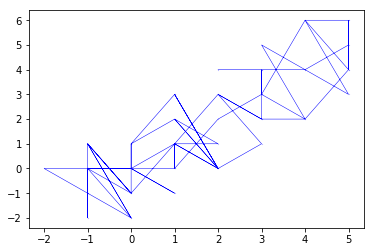

In [49]:
myWalker.createPath()
print(myWalker.getEndPosition())
print( myWalker.calculateRadiusOfGyration() )
myWalker.plotPath()

In [37]:
str(len(myWalker.walkedPath))

'65'

In [96]:
def runRandomWalkSimulationSimple(nSteps, nIteration):
    walker = randomWalk(nSteps)

    radialEndPosition = []
    radiusOfGyration = []
    endPositons = [] # list of vector of endPositons
    for i in range(nIteration):
        walker.createPath()
        radialEndPosition.append( walker.calculateREndToEnd() )
        radiusOfGyration.append( walker.calculateRadiusOfGyration() )
        endPositons.append( walker.getEndPosition()[0] )

    rg = sum(radiusOfGyration)/len(radiusOfGyration)
    endPosDistHisto, endPosDistBins = np.histogram(radialEndPosition, bins="auto")
    endPosDistinXHisto,endPosDistinXBins = np.histogram(endPositons, bins="auto")
    print(rg)

    fig, (ax1, ax2, ax3) = plt.subplots(3) #, sharex=True
    ax1.plot(range(len(radiusOfGyration)),radiusOfGyration, 'g+')
    ax1.set( ylabel='Rg',xlabel='iteration' )
    ax2.bar(endPosDistBins[0:(len(endPosDistHisto))],endPosDistHisto, color='r')
    ax2.set( ylabel='frequency',xlabel='Ree')
    ax3.bar(endPosDistinXBins[0:(len(endPosDistinXHisto))],endPosDistinXHisto, color ='b')
    ax3.set( ylabel='frequency', xlabel='ReeX', )
    

226.3483681425283


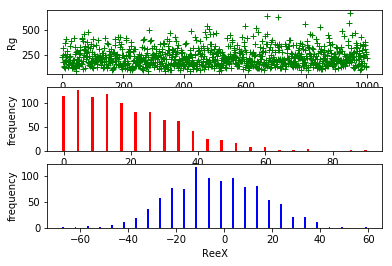

In [98]:
runRandomWalkSimulationSimple(512,1000)